# Documentation for `encounters` Module

### 📌 Note on Graphics

This notebook uses Plotly for its visualizations — I chose it for its ease of use and interactivity. However, GitHub doesn’t support the JavaScript required to render Plotly charts directly. To ensure the visuals display correctly in GitHub’s static notebook viewer, I’ve taken screenshots of the interactive charts and committed those PNG files alongside the notebook.

Each graphics cell ends with:

```py
fig.show()  # Interactive when running locally
display(Image("filename.png"))  # Static fallback for GitHub viewers
``` 
If you’re running this notebook locally, you’ll see the full interactive experience. If you’re viewing it on GitHub, you’ll see the static image instead. This approach keeps the notebook clean while ensuring the visuals are readable in all contexts.

---

The `encounters` module has two functions for working with data on US Border Patrol Encounter data:
  * `get_sw_border_encounters`: returns a cleaned, merged, dataset of monthly encounters at the Southwest Land Border.
  * `get_sw_border_encounters_graph`: returns a preformatted graph of those encounters, suitable for display or analysis.

The data is sourced from two official Department of Homeland Security (DHS) datasets:
  * [CBP Encounters](https://ohss.dhs.gov/khsm/cbp-encounters): includes monthly data from October FY2000 through November FY2025. This module uses only data through FY2024 to avoid overlap with the FYTD dataset.
  * [Southwest Land Border Encounters](https://www.cbp.gov/document/stats/southwest-land-border-encounters): includes fiscal year-to-date (FYTD) data from FY2022 through FY2025. This module uses only FY2025 (FYTD) data.

Although Border Patrol encounters are reported across three regions - Southwest Land Border, Northern Land Border, and Coastal Border - this module focuses exclusively on the **Southwest Land Border**.

The following examples show how to use each function in practice.

## get_sw_border_encounters

In [1]:
import sys
from pathlib import Path

# Add the project root to sys.path so we can import modules from immigration_enforcement/
# This makes it easier to reuse code across notebooks and supports a modular project structure
sys.path.append(str(Path("..").resolve()))

import immigration_enforcement.borderpatrol.encounters as encounters
import plotly.express as px
from IPython.display import display, Image

df = encounters.get_sw_border_encounters()
df

,date,encounters
0,1999-10-01,87820
1,1999-11-01,74360
2,1999-12-01,66260
3,2000-01-01,175380
4,2000-02-01,200620
...,...,...
306,2025-04-01,8377
307,2025-05-01,8725
308,2025-06-01,6068
309,2025-07-01,4596


The data can be graphed as-is with Plotly like this:

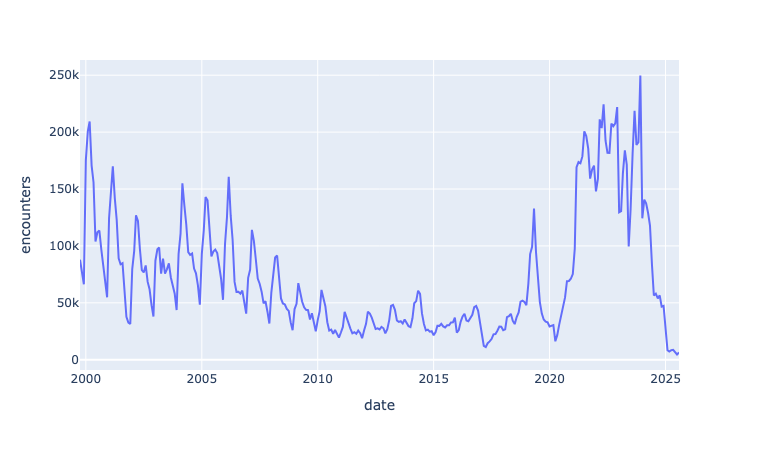

In [2]:
fig = px.line(
    df,
    x="date",
    y="encounters",
)

fig.show()
display(Image("get_sw_border_encounters.png"))

## get_sw_border_encounters_graph

This function has an optional parameter, `annotate_administrations=True`. If True, administration changes will be annotated on the graph.

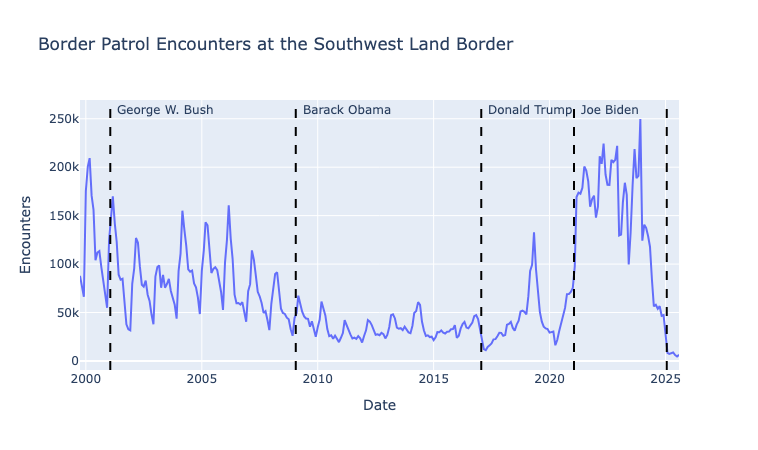

In [3]:
fig = encounters.get_sw_border_encounters_graph()

fig.show()
display(Image("get_sw_border_encounters_graph.png"))